![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# **Proyecto 1 - MDS7202 Laboratorio de Programación Científica para Ciencia de Datos 📚**

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*

### Equipo:

- Daniel Minaya


### Link de repositorio de GitHub: `https://github.com/DanielMinaya1/MDS7202`

Fecha límite de entrega 📆: 6 de Noviembre de 2023.

----

## Reglas

- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia. 
- Pueden usar cualquier material del curso que estimen conveniente.

<div style="text-align: center;">
    <img src="https://worldskateamerica.org/wp-content/uploads/2023/07/SANTIAGO-2023-1-768x153.jpg" alt="Descripción de la imagen">
</div>

En un Chile azotado por un profundo caos político-económico y el resurgimiento de programas de televisión de dudosa calidad, todas las miradas y esperanzas son depositadas en el éxito de un único evento: Santiago 2023. La nación necesitaba desesperadamente un respiro, y los Juegos de Santiago 2023 prometían ser una luz al final del túnel.

El Presidente de la República -conocido en las calles como Bombín-, consciente de la importancia de este evento para la revitalización del país, decide convocar a usted y su equipo en calidad de expertos en análisis de datos y estadísticas. Con gran solemnidad, el presidente les encomienda una importante y peligrosa: liderar un proyecto que permitiera caracterizar de forma automática y eficiente los datos generados por estos magnos juegos. Para esto, el presidente le destaca que la solución debe considerar los siguientes puntos:
- Caracterización automática de los datos
- La solución debe ser compatible con cualquier dataset
- Se les facilita el dataset *olimpiadas.parquet*, el cual recopila data de diferentes juegos olímpicos realizados en los últimos años

In [1]:
import pandas as pd
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy import stats
from scipy.sparse import spmatrix
import shutil
import os
import re

df = pd.read_parquet('olimpiadas.parquet')
df.head()

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,age-height-weight
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,24.0*180.0?80.0
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,23.0(170.0?60.0
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,24.0(nan?nan
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0:nan?nan
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,21.0(185.0?82.0


## 1.1 Creación de `Profiler` Class (4.0 puntos)

Cree la clase `Profiler`. Como mínimo, esta debe tener las siguientes funcionalidades:

1. El método constructor, el cual debe recibir los datos a procesar en formato `Pandas DataFrame`. Además, este método debe generar una carpeta en su directorio de trabajo con el nombre `EDA_fecha`, donde `fecha` corresponda a la fecha de ejecución en formato `DD-MM-YYYY`.

2. El método `summarize`, el cual debe caracterizar las variables del Dataset. Como mínimo, se espera que su método pueda:
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Reportar el tipo de variable
    - Reportar el número y/o porcentaje de valores únicos de la variable
    - Reportar el número y/o porcentaje de valores nulos
    - Si la variables es numérica:
        - Reportar el número y/o porcentaje de valores cero, negativos y outliers
        - Reportar estadística descriptiva como el valor mínimo, máximo, promedio y los percentiles 25, 50, 75 y 100
   - Levantar una alerta en caso de encontrar alguna anomalía fuera de lo común (el criterio debe ser ajustable por el usuario)
   - Guardar sus resultados en el directorio `EDA_fecha/summary.txt`. El archivo debe separar de forma clara y ordenada los resultados de cada punto.

3. El método `plot_vars`, el cual debe graficar la distribución e interaciones de las variables del Dataset. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/plots`
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Para las variables numéricas:
        - Genere un gráfico de distribución de densidad
        - Grafique la correlación entre las variables
    - Para las variables categóricas:
        - Genere un histograma de las top N categorías (N debe ser un parámetro ajustable)
        - Grafique el coeficiente V de Cramer entre las variables
    - Guardar cada gráfico generado en la carpeta `EDA_fecha/plots` en formato `.pdf` y bajo el naming `variable.pdf`, donde `variable` es el nombre de la variable de interés
    
4. El método `clean_data`, el cual debe limpiar los datos para que luego puedan ser procesados. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/clean_data`
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Drop de valores duplicados
    - Implementar como mínimo 2 técnicas para tratar los valores nulos, como:
        - Drop de valores nulos
        - Imputar valores nulos con alguna técnica de imputación
        - Funcionalidad para escoger entre una técnica y la otra.
    - Una de las columnas del dataframe presenta datos *no atómicos*. Separe dicha columna en las columnas que la compongan.
        - Hint: ¿Qué caracteres permiten separar una columna de otra?
        - Para las pruebas con el dataset nuevo, puede esperar que exista al menos una columna con este tipo de problema. Asuma que los separadores serán los mismos, aunque el número de columnas a separar puede ser distinto.
    - Deberían usar `FunctionTransformer`.
    - Guardar los datos procesados en formato `.csv` en el path `EDA_fecha/clean_data/data.csv`

5. El método `scale`, el cual debe preparar adecuadamente los datos para luego ser consumidos por algún tipo de algoritmo. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/scale`
    - Procesar de forma adecuada los datos numéricos y categóricos:
        - Su método debe recibir las técnicas de escalamiento como argumento de entrada (utilizar solo técnicas compatibles con el framework de `sklearn`)
        - Para los atributos numéricos, se transforme los datos con un escalador logarítmico y un `MinMaxScaler`
        - Asuma que no existen datos ordinales en su dataset
    - Guardar todo este procesamiento en un `ColumnTransformer`.
    - Guardar los datos limpios y transformados en formato `.csv` en el path `EDA_fecha/scale/scaled_features.csv`

6. El método `make_clusters`, el cual debe generar clusters de los datos usando algún algoritmo de clusterización. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/clusters`
    - Generar un estudio del codo donde señale la cantidad de clusters optimos para el desarrollo.
    - Su método debe recibir el algoritmo de clustering como argumento de entrada (utilizar solo algoritmos compatibles con el framework de `sklearn`).
    - No olvide pre procesar adecuadamente los datos antes de implementar la técnica de clustering. 
    - En este punto es espera que generen un `Pipeline` de sklearn. Además, su método debería usar lo construido en los puntos 4 y 5. 
    - Su método debe ser capaz de funcionar a partir de datos crudos (se descontará puntaje de lo contrario).
    - Una vez generado los clusters, proyecte los datos a 2 dimensiones usando su técnica de reducción de dimensionalidad favorita y grafique los resultados coloreando por cluster.
    - Guardar los datos con su respectivo cluster en formato `.csv` en el path `EDA_fecha/clusters/data_clusters.csv`. Guarde también los gráficos generados en el mismo path.

7. El método `detect_anomalies`, el cual debe detectar anomalías en los datos. Como mínimo, se espera que su método pueda:

    - Crear la carpeta `EDA/anomalies`
    - Implementar alguna técnica de detección de anomalías.
    - Al igual que el punto anterior, su método debe considerar los siguientes puntos:
        - No olvide pre procesar de forma adecuada los datos antes de implementar la técnica de detección de anomalía. 
        - En este punto es espera que generen un `Pipeline` de sklearn. Además, su método debería usar lo construido en los puntos 4 y 5. 
        - Su método debe ser capaz de funcionar a partir de datos crudos (se descontará puntaje de lo contrario).
        - Su método debe recibir el algoritmo como argumento de entrada
        - Una vez generado las etiquetas, proyecte los datos a 2 dimensiones y grafique los resultados coloreando por las etiquetas predichas por el detector de anomalías
    - Guardar los datos con su respectiva etiqueta en formato `.csv` en el path `EDA_fecha/anomalies/data_anomalies.csv`. Guarde también los gráficos generados en el mismo path.

8. El método `profile`, el cual debe ejecutar todos los métodos anteriores.

9. Crear el método `clearGarbage` para eliminar las carpetas/archivos creados/as por la clase `EDA`.

Algunas consideraciones generales:
- Su clase será testeada con datos tabulares diferentes a los provistos. No desarrollen código *hardcodeado*: su clase debe ser capaz de funcionar para **cualquier** dataset. 
- Aplique todo su conocimiento sobre buenas prácticas de programación: se evaluará que su código sea limpio y ordenado.
- Recuerden documentar cada una de las funcionalidades que implementen.
- Recuerden adjuntar sus `requirements.txt` junto a su entrega de proyecto. **El código que no se pueda ejecutar por incompatibilidades de librerías no será corregido.**

In [2]:
class Profiler():
    # Constructor
    def __init__(self, dataframe):
        # Verificamos que se reciba un DataFrame
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Debe entregar un DataFrame de Pandas!")
        
        # Añadimos el DataFrame como un atributo de la clase
        self.dataframe = dataframe
        
        # Creamos la carpeta EDA_fecha si no existe
        now = datetime.now().strftime("%d-%m-%Y")
        self.folder_name = f"EDA_{now}"
        if not os.path.exists(self.folder_name):
            os.mkdir(self.folder_name)
            print(f"Carpeta creada: {self.folder_name}")
    
    def sep_columns_type(self, dataframe_in):
        """
        Separación de columnas de un dataframe entre numérica y categórica
        
        Parameters
        ----------
        dataframe_in: pd.Dataframe
            Dataframe de entrada
        
        Returns
        num_cols: list(str)
            Lista con el nombre de las columnas numéricas
        cat_cols: list(str)
            Lista con el nombre de las columnas categóricas
        -------
        """
        
        # Separamos las columnas entre numéricas y categóricas
        num_cols = dataframe_in.select_dtypes(include=['number']).columns.tolist()
        cat_cols = dataframe_in.select_dtypes(include=['object']).columns.tolist()
        
        return num_cols, cat_cols
    
    def summarize(self, variables):
        """
        Resumen de variables
        
        Parameters
        ----------
        variables: list(str)
            Lista con las variables del dataframe a resumir
        """
        
        # Definimos el nombre del txt
        self.summary_file_name = os.path.join(self.folder_name, "summary.txt")
        
        # Obtenemos el tipo de las variables
        num_cols, cat_cols = self.sep_columns_type(self.dataframe)
        
        # Escribimos en el archivo EDA_fecha/summary.txt
        with open(self.summary_file_name, "w") as summary_file:
            # Hacemos el análisis para cada variable entregada
            for variable in variables:
                # Chequeamos si la variable está en el dataframe, sino levantamos un error
                if variable in self.dataframe.columns:
                    # Obtenemos la serie
                    serie = self.dataframe[variable]
                    
                    # Escribimos el nombre de variable
                    summary_file.write(f"Variable: {variable}\n")
                    
                    # Escribimos el tipo de variable
                    summary_file.write(f"Tipo: {serie.dtype}\n")
                    
                    # Obtenemos el total de datos
                    total_count = len(self.dataframe)
                    
                    # Escribimos la cantidad de elementos únicos y el porcentaje de elementos únicos
                    unique_count = serie.nunique()
                    unique_percentage = round((unique_count / total_count) * 100, 2)
                    summary_file.write(f"Cantidad de valores únicos: {unique_count} ({unique_percentage}%)\n")
                    
                    # Escribimos la cantidad de elementos nulos y el porcentaje de elementos nulos
                    null_count = serie.isnull().sum()
                    null_percentage = round((null_count / total_count) * 100, 2)
                    summary_file.write(f"Cantidad de valores nulos: {null_count} ({null_percentage}%)\n")
                    
                    # Chequeamos si la variable es numérica
                    if variable in num_cols:
                        # Obtenemos la cantidad de ceros y negativos
                        zero_count = (serie == 0).sum()
                        zero_percentage = round((zero_count / total_count) * 100, 2)
                        
                        negative_count = (serie < 0).sum()
                        negative_percentage = round((negative_count / total_count) * 100, 2)
                        
                        # Escribimos la cantidad de ceros y el porcentaje de ceros
                        summary_file.write(f"Cantidad de ceros: {zero_count} ({zero_percentage}%)\n")
                        
                        # Escribimos la cantidad de negativos y el porcentaje de negativos
                        summary_file.write(f"Cantidad de valores negativos: {negative_count} ({negative_percentage}%)\n")
                        
                        # Obtenemos la cantidad de outliers
                        no_outliers = serie.loc[(np.abs(stats.zscore(serie)) < 3)]
                        
                        # Escribimos la cantidad de outliers
                        summary_file.write(f"Cantidad de outliers: {total_count - len(no_outliers)}\n")

                        # Escribimos las estadísticas descriptivas
                        summary_file.write("Estadísticas descriptivas:\n")
                        summary_file.write(f"\tMínimo: {serie.min()}\n")
                        summary_file.write(f"\tMáximo: {serie.max()}\n")
                        summary_file.write(f"\tPromedio: {round(serie.mean(), 2)}\n")
                        summary_file.write(f"\tPercentil 25: {round(serie.quantile(0.25), 2)}\n")
                        summary_file.write(f"\tPercentil 50: {round(serie.quantile(0.5), 2)}\n")
                        summary_file.write(f"\tPercentil 75: {round(serie.quantile(0.75), 2)}\n")
                        summary_file.write(f"\tPercentil 100: {round(serie.quantile(1), 2)}\n")
                    
                    # Salto de línea para la siguiente variable
                    summary_file.write("\n")
                    
                else:
                    raise ValueError(f"La columna {variable} no existe en el DataFrame!")
                    
    def plot_vars(self, variables, N=5, n_samples=5000, random_state=42):
        """
        Gráfico de variables
        
        Parameters
        ----------
        variables: list(str)
            Lista con las variables del dataframe a graficar
        N: int
            Número de top categorías a considerar
        n_samples: int
            Número de muestras para calcular coeficiente V de Cramer
        random_state: int
            Semilla para el muestreo
        """
        
        # Creamos la carpeta EDA_fecha/plots si es que no existe
        self.plots_folder = os.path.join(self.folder_name, 'plots')
        if not os.path.exists(self.plots_folder):
            os.mkdir(self.plots_folder)
            print(f"Carpeta creada: {self.plots_folder}")
        
        # Obtenemos el tipo de las variables
        num_cols, cat_cols = self.sep_columns_type(self.dataframe)
        
        # Flags para plotear matriz de correlación y coeficiente V de Cramer
        corr_bool, cramer_bool = True, True
        
        # Revisamos cada variable entregada
        for variable in variables:
            # Chequeamos si la variable está en el dataframe, sino levantamos un error
            if variable in self.dataframe.columns:
                # Obtenemos la serie
                serie = self.dataframe[variable]
                    
                # Chequeamos si la variable es numérica
                if variable in num_cols:
                    # Generamos un gráfico con la distribución
                    plt.figure(figsize=(8, 5))
                    sns.histplot(serie, kde=True) # kde = True grafica la densidad
                    plt.title(f'Distribución de {variable}')
                    plt.xlabel(f'{variable}')
                    plt.ylabel('Frecuencia')
                    
                    # Guardamos el gráfico
                    plt.savefig(os.path.join(self.plots_folder, f'{variable}.pdf'), bbox_inches='tight')
                    
                    # Cerramos el gráfico para no plotear en el notebook
                    plt.close()
                    
                    # Graficamos solo una vez
                    if corr_bool:
                        # Calculamos la correlación con las otras variables numéricas
                        corr_matrix = self.dataframe[num_cols].corr()

                        # Graficamos la matriz de correlación entre las variables numéricas
                        plt.figure(figsize=(8, 5))
                        sns.heatmap(corr_matrix, annot=True, cmap='viridis')
                        plt.title(f'Matriz de correlación')
                        plt.savefig(os.path.join(self.plots_folder, f'Matriz_de_correlación.pdf'), bbox_inches='tight')
                        
                        plt.close()
                        
                        corr_bool = False
                
                # Chequeamos si la variable es categórica
                elif variable in cat_cols:
                    # Obtenemos las primeras N categorías
                    top = serie.value_counts()[0:N]
                    
                    # Graficamos las primeras N categorías
                    plt.figure(figsize=(8, 5))
                    sns.barplot(x=top.values, y=top.index)
                    plt.title(f'Top {N} categorías para {variable}')
                    plt.xlabel('Frecuencia')
                    plt.ylabel(f'{variable}')
                    plt.savefig(os.path.join(self.plots_folder, f'{variable}.pdf'), bbox_inches='tight')
                    plt.close()
                    
                    # Graficamos solo una vez
                    if cramer_bool:
                        # Obtenemos el coeficiente V de Cramer entre las variables categóricas
                        # Fuente: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V#Calculation
                        cramer_matrix = np.eye(len(cat_cols))
                        for i in range(len(cat_cols)):
                            for j in range(i+1, len(cat_cols)):
                                # Obtenemos un dataframe con todos los pares (A_i, B_j) 
                                # tomando n_samples muestras para evitar problemas de memoria
                                confusion_matrix = pd.crosstab(self.dataframe[cat_cols[i]].sample(n_samples, random_state=random_state), 
                                                               self.dataframe[cat_cols[j]].sample(n_samples, random_state=random_state))

                                # Obtenemos n_{i,\cdot}, n_{\cdot,j}
                                row_totals = confusion_matrix.sum(axis=1)
                                col_totals = confusion_matrix.sum(axis=0)

                                # Obtenemos n: total de observaciones
                                n = confusion_matrix.sum().sum()

                                # Obtenemos n_{i,\cdot}*n_{\cdot,j} / n
                                product = np.outer(row_totals, col_totals) / n

                                # Obtenemos Xi^2
                                chi2 = ((confusion_matrix - product) ** 2 / product).sum().sum()

                                # Obtenemos r: número de filas, k: número de columnas
                                r, k = confusion_matrix.shape

                                # Obtenemos el coeficiente V de Cramer
                                cramer_matrix[i][j] = np.sqrt((chi2 / n) / min((k-1), (r-1)))
                                cramer_matrix[j][i] = cramer_matrix[i][j]

                        # Graficamos
                        plt.figure(figsize=(8, 5))
                        sns.heatmap(cramer_matrix, annot=True, cmap='viridis', xticklabels=cat_cols, yticklabels=cat_cols)
                        plt.title('Coeficiente V de Cramer')
                        plt.savefig(os.path.join(self.plots_folder, f'Coeficiente_V_de_Cramer.pdf'), bbox_inches='tight')
                        plt.close()
                        
                        cramer_bool = False

            else:
                raise ValueError(f"La columna {variable} no es de tipo numérica o categórica!")
                
    def clean_data(self, variables, null_values='deletion'):
        """
        Limpieza de dataframe
        
        Parameters
        ----------
        variables: list(str)
            Lista con las variables del dataframe a limpiar
        null_values: "deletion" or "imputation"    
            Técnica para el tratamiento de valores nulos
        """
        
        self.clean_data_folder = os.path.join(self.folder_name, "clean_data")
        
        # Creamos la carpeta EDA_fecha/clean_data si no existe
        if not os.path.exists(self.clean_data_folder):
            os.mkdir(self.clean_data_folder)
            print(f"Carpeta creada: {self.clean_data_folder}")
        
        # Definimos las funciones
        def drop_duplicates(dataframe_in):
            return dataframe_in.drop_duplicates()
        
        def delete_nulls(dataframe_in):
            return dataframe_in.dropna()
        
        def impute_nulls(dataframe_in):
            num_cols, cat_cols = self.sep_columns_type(dataframe_in)
            
            # Definimos los imputadores y los pipeline
            num_imputer = SimpleImputer(strategy="mean")
            cat_imputer = SimpleImputer(strategy="constant", fill_value="Sin valor", missing_values=None)
            
            num_pipeline = Pipeline(steps=[("num_imputer", num_imputer)])
            cat_pipeline = Pipeline(steps=[("cat_imputer", cat_imputer)])
            
            # Definimos el transformador
            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", num_pipeline, num_cols),
                    ("cat", cat_pipeline, cat_cols)
                ],
                remainder="passthrough"
            )
            
            preprocessed_data = preprocessor.fit_transform(dataframe_in)
            preprocessed_data = pd.DataFrame(preprocessed_data)

            return preprocessed_data
        
        # Suponemos que los separadores en los datos son solo '*', '(', ':', or '?'
        def split_values(value):
            # Se puede modificar el string para admitir más separadores
            parts = re.split(r'[*(:?]', value)
            return parts
        
        def get_non_atomic_columns(dataframe_in):
            non_atomic_cols = []

            num_cols, cat_cols = self.sep_columns_type(dataframe_in)
            
            # Revisamos cada columna para saber si tiene datos no-atómicos 
            for col in cat_cols:
                # Hacemos la separación
                temp = dataframe_in[col].map(split_values)

                # Si las listas generadas tienen igual largo > 1, entonces son datos no-atómicos
                min_list_length = temp.apply(len).min()
                max_list_length = temp.apply(len).max()
                if min_list_length > 1 and min_list_length == max_list_length:
                    # Guardamos la columna y la cantidad de átomos para separar
                    non_atomic_cols.append((min_list_length, col))

            return non_atomic_cols
        
        def separate_non_atomic_data(dataframe_in):
            # NOTA: Asumimos que los datos no-atómicos son numéricos y que el valor nulo es 'nan'
            dataframe_out = dataframe_in.apply(pd.to_numeric, errors='ignore')
            
            non_atomic_cols = get_non_atomic_columns(dataframe_out)

            for (number_of_atoms, col) in non_atomic_cols:
                # Generamos los nombres de las nuevas columnas
                new_columns = [f'{col}_{i}' for i in range(number_of_atoms)]

                # Separamos
                temp = dataframe_out[col].apply(split_values).apply(pd.Series)

                # Convertimos a datos numéricos (si es 'nan' se reemplaza por NaN)
                temp= temp.apply(pd.to_numeric, errors='coerce')

                # Agregamos las nuevas columnas
                dataframe_out[new_columns] = temp
      
                # Eliminamos la columna no-atómica
                dataframe_out = dataframe_out.drop(col, axis=1)

            return dataframe_out.rename(str, axis="columns") 
             
        # Copiamos el dataframe
        dataframe_out = self.dataframe[variables].copy()
        num_cols, cat_cols = self.sep_columns_type(dataframe_out)
        
        # Lista para guardar los pasos del pipeline
        steps = []

        # Eliminamos valores duplicados
        steps.append(("drop_duplicates", FunctionTransformer(drop_duplicates)))
        
        # Eliminamos valores faltantes
        if null_values == 'deletion':
            steps.append(("delete_nulls", FunctionTransformer(delete_nulls)))
            
        elif null_values == 'imputation':
            steps.append(("impute_nulls", FunctionTransformer(impute_nulls)))
            
        else:
            raise ValueError("Técnica inválida para valores nulos! (debe ser 'deletion' o 'imputation')")
        
        # Separamos data no-atómica
        steps.append(("separate_non_atomic_data", FunctionTransformer(separate_non_atomic_data)))
        
        # Volvemos a eliminar valores nulos y faltantes luego de agregar las nuevas columnas
        steps.append(("drop_duplicates_2", FunctionTransformer(drop_duplicates)))
        
        if null_values == 'deletion':
            steps.append(("delete_nulls_2", FunctionTransformer(delete_nulls)))
            
        elif null_values == 'imputation':
            steps.append(("impute_nulls_2", FunctionTransformer(impute_nulls)))
            
        else:
            raise ValueError("Técnica inválida para valores nulos! (debe ser 'deletion' o 'imputation')")
            
        # Definimos la pipeline y transformamos
        pipeline = Pipeline(steps)
        dataframe_out = pipeline.fit_transform(dataframe_out)
        
        # Convertimos las columnas numéricas
        dataframe_out = dataframe_out.apply(pd.to_numeric, errors='ignore')
        
        # Guardamos el dataframe 
        dataframe_out.to_csv(os.path.join(self.clean_data_folder, "data.csv"), index=False)
        
        # Dejamos como atributo el dataframe limpio
        self.clean_dataframe = dataframe_out
        
        return dataframe_out
        
    def scale(self, algorithm=OneHotEncoder, save_csv=False):
        """
        Escalamiento de datos
        
        Parameters
        ----------
        variables: list(str)
            Lista con las variables del dataframe a escalar
        algorithm: Modelo de sklearn.preprocessing
            Modelo para codificar las variables categóricas
        save_csv: bool
            Indicador para guardar el dataframe (puede ser muy grande)
        """
        
        self.scale_folder = os.path.join(self.folder_name, "scale")
        
        # Creamos la carpeta EDA_fecha/scale si no existe
        if not os.path.exists(self.scale_folder):
            os.mkdir(self.scale_folder)
            print(f"Carpeta creada: {self.scale_folder}")
        
        # Trabajamos sobre el dataframe limpio
        clean_dataframe = self.clean_data(self.dataframe.columns)
        num_cols, cat_cols = self.sep_columns_type(clean_dataframe)
            
        # Definimos escalador logarítmico
        def log_transform(x):
            return np.log(x+1)
        
        logarithmic_transformer = Pipeline([
            ('log_transform', FunctionTransformer(func=log_transform))
        ])

        # Definimos las transformaciones para datos numéricos
        num_transformer = Pipeline([
            ("logarithmic", logarithmic_transformer),
            ("minmax", MinMaxScaler())
        ])
        
        # Definimos la transformación para datos categóricos
        cat_transformer = Pipeline([
            ("cat", algorithm())
        ])
            
        # Aplicamos las transformaciones
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat_transformer", cat_transformer, cat_cols),
                ("num_transformer", num_transformer, num_cols)
            ],
            remainder="passthrough"
        )

        scaled_features = preprocessor.fit_transform(clean_dataframe)
        
        # Convertir los datos transformados de una matriz sparse a un DataFrame
        if isinstance(scaled_features, spmatrix):
            scaled_df = pd.DataFrame.sparse.from_spmatrix(scaled_features)
        else:
            scaled_df = pd.DataFrame(scaled_features)

        # Guardamos el dataframe 
        if save_csv:
            scaled_df.to_csv(os.path.join(self.scale_folder, "scaled_features.csv"), index=False)
        
        # Dejamos como atributo el dataframe escalado
        self.scaled_dataframe = scaled_df
        
        return scaled_df

    def make_clusters(self, algorithm=KMeans, parameter=20):
        """
        Clustering de datos
        
        Parameters
        ----------
        algorithm: Modelo de sklearn.cluster
            Algoritmo para realizar clustering (solo soporte para KMeans y DBSCAN)
        parameter: int
            En KMeans es el número de clusters a probar
            En DBSCAN es el número mínimo de muestras para formar un cluster
        """
        
        self.clusters_folder = os.path.join(self.folder_name, "clusters")
        
        # Creamos la carpeta EDA_fecha/clusters si no existe
        if not os.path.exists(self.clusters_folder):
            os.mkdir(self.clusters_folder)
            print(f"Carpeta creada: {self.clusters_folder}")
        
        # Trabajamos con el dataframe limpio y escalado
        scaled_data = self.scale()
        
        # Reducimos dimensionalidad
        pca = PCA(n_components=2)
        if isinstance(scaled_data, spmatrix):
            pca_values = pca.fit_transform(scaled_data.values.toarray())
        else:
            pca_values = pca.fit_transform(scaled_data.values)
            
        pca_dataframe = pd.DataFrame(pca_values, columns=['PCA1', 'PCA2'])
        
        # Aplicamos clustering (el método del codo depende del algoritmo)
        if algorithm == KMeans:
            cluster_range = parameter
            
            K = range(2, cluster_range+1, 2)
            SSEs = []

            # Método del codo
            for k in K:
                model = algorithm(n_clusters=k, random_state=42, n_init=10)
                model.fit(scaled_data)
                SSEs.append(model.inertia_)

            plt.figure(figsize=(8, 5))
            plt.plot(K, SSEs, marker='o', linestyle='-')
            plt.xlabel('Número de clusters')
            plt.ylabel('SSE')
            plt.title('Método del codo')
            plt.grid()
            plt.savefig(os.path.join(self.clusters_folder, 'elbow_method.pdf'), bbox_inches='tight')
            plt.show()
            
            # Hacemos clustering con k óptimo
            optimal_k = int(input('Ingrese el número óptimo de clusters: '))
            model = algorithm(n_clusters=optimal_k, random_state=42, n_init=10)
            
        elif algorithm == DBSCAN:
            min_samples = parameter

            # Método del codo
            nbrs = NearestNeighbors(n_neighbors=min_samples).fit(scaled_data)
            distances, indices = nbrs.kneighbors(scaled_data)

            distances = np.sort(distances, axis=0)
            distances = distances[:,1]
            plt.figure(figsize=(8, 5))
            plt.plot(distances)
            plt.ylabel('eps')
            plt.title('Método del codo')
            plt.grid()
            plt.savefig(os.path.join(self.clusters_folder, 'elbow_method.pdf'), bbox_inches='tight')
            plt.show()
            
            # Hacemos clustering con eps óptimo
            optimal_eps = float(input('Ingrese el valor óptimo para eps: '))
            model = algorithm(eps=optimal_eps, min_samples=min_samples)
        
        else:
            raise ValueError("Algoritmo de clustering no soportado. Debe ser KMeans o DBSCAN!")

        model.fit(scaled_data)

        # Agregamos los clusters
        clean_data = self.clean_dataframe
        clean_data["Cluster"] = model.labels_
        pca_dataframe["Cluster"] = model.labels_
        
        # Guardamos y graficamos
        clean_data.to_csv(os.path.join(self.clusters_folder, 'data_clusters.csv'), index=False)

        plt.figure(figsize=(8, 5))
        plt.scatter(pca_dataframe['PCA1'], pca_dataframe['PCA2'], c=pca_dataframe['Cluster'], cmap='viridis')
        plt.title('Clustering en 2D')
        plt.savefig(os.path.join(self.clusters_folder, 'clustering.pdf'), bbox_inches='tight')
        plt.close()
        
    def detect_anomalies(self, algorithm=LocalOutlierFactor):
        """
        Detección de anomalías
        
        Parameters
        ----------
        algorithm: Modelo de sklearn
            Algoritmo para la detección de anomalías
        """
        
        self.anomalies_folder = os.path.join(self.folder_name, "anomalies")
        
        # Creamos la carpeta EDA_fecha/anomalies si no existe
        if not os.path.exists(self.anomalies_folder):
            os.mkdir(self.anomalies_folder)
            print(f"Carpeta creada: {self.anomalies_folder}")

        # Preprocesamos
        scaled_data = self.scale()
        
        # Reducimos dimensionalidad
        pca = PCA(n_components=2)
        if isinstance(scaled_data, spmatrix):
            pca_values = pca.fit_transform(scaled_data.values.toarray())
        else:
            pca_values = pca.fit_transform(scaled_data.values)

        pca_dataframe = pd.DataFrame(pca_values, columns=['PCA1', 'PCA2'])
    
        model = algorithm()
        outliers = model.fit_predict(scaled_data)
        
        # Agregamos etiquetas al dataframe limpio
        clean_data = self.clean_dataframe
        clean_data["Anomaly"] = outliers
        pca_dataframe["Anomaly"] = outliers

        # Guardamos el csv
        clean_data.to_csv(os.path.join(self.anomalies_folder, "data_anomalies.csv"), index=False)

        # Graficamos
        plt.figure(figsize=(8, 5))
        plt.scatter(pca_dataframe[pca_dataframe["Anomaly"] == 1]["PCA1"],
                    pca_dataframe[pca_dataframe["Anomaly"] == 1]["PCA2"], 
                    label="Normal")
        plt.scatter(pca_dataframe[pca_dataframe["Anomaly"] == -1]["PCA1"],
                    pca_dataframe[pca_dataframe["Anomaly"] == -1]["PCA2"],        
                    label="Anomaly")
        plt.legend()
        plt.title("Detección de anomalías")
        plt.savefig(os.path.join(self.anomalies_folder, "anomaly_plot.pdf"), bbox_inches='tight')
        plt.close()
    
    def profile(self):
        self.summarize(self.dataframe.columns)
        self.plot_vars(self.dataframe.columns, N=10)
        self.make_clusters()
        self.detect_anomalies()
    
    def clearGarbage(self):
        if os.path.exists(self.folder_name):
            shutil.rmtree(self.folder_name)
            print(f"Carpetas y archivos creados por la clase EDA eliminados con éxito")

Carpeta creada: EDA_06-11-2023
Carpeta creada: EDA_06-11-2023\plots
Carpeta creada: EDA_06-11-2023\clusters
Carpeta creada: EDA_06-11-2023\scale
Carpeta creada: EDA_06-11-2023\clean_data


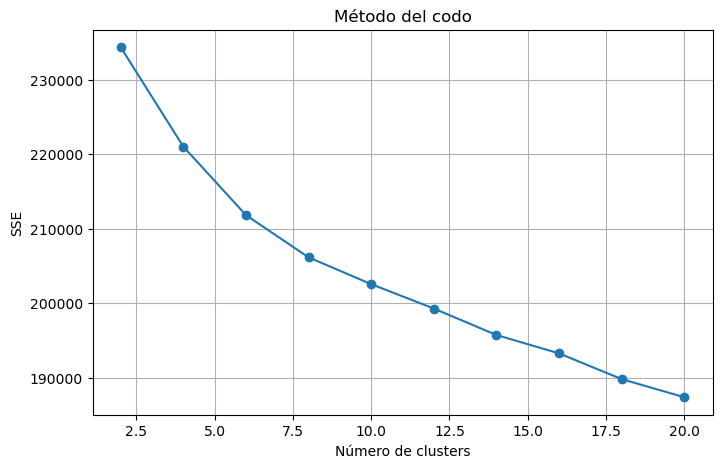

Ingrese el número óptimo de clusters: 8
Carpeta creada: EDA_06-11-2023\anomalies


In [3]:
profiler = Profiler(df)
profiler.profile()

In [5]:
data_clusters = pd.read_csv("EDA_06-11-2023/clusters/data_clusters.csv")
clusters = data_clusters.groupby('Cluster')
clusters.mean(numeric_only=True)

,ID,Year,age-height-weight_0,age-height-weight_1,age-height-weight_2
Cluster,,,,,
0,72865.367300,1995.025475,24.505327,170.764706,63.378184
1,70994.442509,1995.315679,24.385017,171.126132,63.463240
2,70215.873093,1984.629661,25.997669,181.366525,79.176165
3,70465.603612,1984.044695,26.145147,180.733634,78.894244
4,64839.198471,1977.420835,24.320484,182.317299,77.911755
5,69911.986896,1984.898885,25.787013,180.982593,78.701447
6,72320.341781,1995.532877,24.718836,170.920548,63.475514
7,70946.548861,1993.075362,26.020497,175.603520,72.765217


In [6]:
most_frequent_categories = {}
for name, group in clusters:
    cluster_frequent_categories = {}
    for col in ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']:
        mode = group[col].mode().iloc[0]
        cluster_frequent_categories[col] = mode

    most_frequent_categories[name] = cluster_frequent_categories

pd.DataFrame(most_frequent_categories).T

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
0,Larysa Semenivna Latynina (Diriy-),F,Soviet Union,URS,2008 Summer,Summer,Beijing,Athletics,Hockey Women's Hockey,Gold
1,Shirley Frances Babashoff,F,United States,USA,2016 Summer,Summer,Rio de Janeiro,Athletics,Volleyball Women's Volleyball,Silver
2,Aleksandr Nikolayevich Dityatin,M,Soviet Union,URS,2000 Summer,Summer,London,Athletics,Football Men's Football,Silver
3,Paavo Johannes Nurmi,M,Soviet Union,URS,2004 Summer,Summer,London,Athletics,Football Men's Football,Gold
4,"Michael Fred Phelps, II",M,United States,USA,1984 Summer,Summer,Los Angeles,Athletics,Basketball Men's Basketball,Gold
5,Aleksey Yuryevich Nemov,M,Soviet Union,URS,2000 Summer,Summer,London,Athletics,Football Men's Football,Bronze
6,Franziska van Almsick,F,United States,USA,2016 Summer,Summer,Rio de Janeiro,Athletics,Volleyball Women's Volleyball,Bronze
7,Ole Einar Bjrndalen,M,Canada,CAN,2014 Winter,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver


In [9]:
data_anomalies = pd.read_csv("EDA_06-11-2023/anomalies/data_anomalies.csv")
anomalies = data_anomalies.groupby('Anomaly')
anomalies.mean(numeric_only=True)

,ID,Year,age-height-weight_0,age-height-weight_1,age-height-weight_2
Anomaly,,,,,
-1,77255.560000,2000.32000,26.120000,178.320000,76.620000
1,70214.284524,1987.98553,25.427865,177.641233,73.748797


In [11]:
most_frequent_categories = {}
for name, group in anomalies:
    anomalies_frequent_categories = {}
    for col in ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']:
        mode = group[col].mode().iloc[0]
        anomalies_frequent_categories[col] = mode

    most_frequent_categories[name] = anomalies_frequent_categories

pd.DataFrame(most_frequent_categories).T

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
-1,Bjrn Johan Lind,M,Canada,CAN,1992 Winter,Winter,Albertville,Figure Skating,Curling Men's Curling,Bronze
1,"Michael Fred Phelps, II",M,United States,USA,2008 Summer,Summer,London,Athletics,Ice Hockey Men's Ice Hockey,Gold


## 1.2 Caracterizar datos de Olimpiadas (2.0 puntos)

A partir de la clase que hemos desarrollado previamente, procederemos a realizar un análisis exhaustivo de los datos proporcionados en el enunciado. Este análisis se presentará en forma de un informe contenido en el mismo Jupyter Notebook y abordará los siguientes puntos:

1. Introducción
    - Se proporcionará una breve descripción del problema que estamos abordando y se explicará la metodología que se seguirá.

Elaborar una breve introducción con todo lo necesario para entender qué realizarán durante su proyecto. La idea es que describan de manera formal el proyecto con sus propias palabras y logren describir algunos aspectos básicos tanto del dataset como del análisis a realizar sobre los datos.

Por lo anterior, en esta sección ustedes deberán ser capaces de:

- Describir la tarea asociada al dataset.
- Describir brevemente los datos de entrada que les provee el problema.
- Plantear hipótesis de cómo podrían abordar el problema.

2. Análisis del EDA (Análisis Exploratorio de Datos)
    - Se discutirán las observaciones y conclusiones obtenidas acerca de los datos proporcionados. A lo largo de su respuesta, debe responder preguntas como:
        - ¿Como se comportan las variables numéricas? ¿y las categóricas?
        - ¿Existen valores nulos en el dataset? ¿En qué columnas? ¿Cuantos?
        - ¿Cuáles son las categorías y frecuencias de las variables categóricas?
        - ¿Existen datos duplicados en el conjunto?
        - ¿Existen relaciones o patrones visuales entre las variables?
        - ¿Existen anomalías notables o preocupantes en los datos?
3. Creación de Clusters y Anomalías
    - Se justificará la elección del número de clusters y se aplicarán técnicas de clusterización para segmentar los datos.
4. Análisis de Resultados
    - Se examinarán los resultados obtenidos a partir de los clústers y anomalías generadas. ¿Se logra una separación efectiva de los datos? Entregue una interpretación de lo que representa cada clúster y anomalía.
5. Conclusión
    - Se resumirán las principales conclusiones del análisis y se destacarán las implicaciones prácticas de los resultados obtenidos.

### Informe

1. Introducción

>En este informe se llevará a cabo un análisis exhaustivo de los datos correspondientes a los juegos olímpicos de años anteriores. El objetivo principal de este análisis es obtener una mayor compresión de los datos y extraer información que pueda ser relevante para la toma de decisiones teniendo en cuenta el contexto actual de los juegos de Santiago 2023.
>
>La metodología a seguir incluirá varias etapas como la exploración de los datos, limpieza de datos, escalado de datos, identificación de grupos mediante algoritmos de clustering, y por último, detección de anomalías en los datos. Además, se utilizarán herramientas y técnicas estadísticas y de visualización para respaldar nuestro análisis.
>
>La tarea se centra en la caracterización automática de un conjunto de datos, con el objetivo de extraer conocimientos significativos y valiosos. Nuestro enfoque se basará en comprender la estructura y las características de los datos, así como en identificar patrones, tendencias y relaciones clave dentro de ellos. Además, buscaremos detectar posibles anomalías o áreas de interés que requieran una exploración más detallada.
>
>El conjunto de datos proporcionado corresponde a los juegos olímpicos desde el año 1896 hasta el año 2016. Este conjunto de datos contiene el registro de los participantes en estos juegos, tanto como su sexo, la edición en la que participaron, el evento en el que participaron, las medallas obtenidas en caso de ser ganador de alguna, y otros datos como su edad, altura y peso.
>
>Alguna de las hipótesis iniciales que consideramos en este análisis incluyen: existencia de patrones temporales, como tendencias estacionales o cambios a lo largo de los años; relación entre las variables, donde esperamos que puedan existir una correlación entre dos variables específicas, y posteriormente analizar si esta relación es relevante para los modelos implementados; distribución de los datos, donde suponemos que algunas variables seguirán ciertos patrones comunes; y por último, consideramos la posibilidad de la presencia de valores atípicos en los datos que puedan indicar situaciones especiales o errores en la recopilación de los datos.

2. Análisis del EDA (Análisis Exploratorio de Datos)

>En esta sección, realizaremos un análisis exhaustivo del conjunto de datos. 
>
>Hemos observado que hay dos variables numéricas: <code>ID</code> y <code>Year</code>. La variable <code>ID</code> es un identificador de cada participante y hay un 50% de valores únicos, es decir, la mitad de los participantes se repiten dos veces, lo cual tiene sentido pues los eventos tienen dos tipos: individual y en equipo. Por otro lado la variable <code>Year</code> presenta 35 valores únicos que corresponden a los años en los que se realizaron los juegos olímpicos. Ninguna de estas variables tiene valores nulos ni tampoco existen anomalías preocupantes. Pasando a los gráficos, vemos que la cantidad de participantes aumentó a lo largo de los años, llegando a su peak alrededor de los 1990, y posteriormente se estabiliza manteniéndose constante.
>
>El resto de variables son categóricas que entregan diversa información de los juegos, como el evento, la temporada, el nombre de los participantes, la ciudad, el tipo de deporte y la medalla. La variable <code>age-height-weight</code> es una anomalía preocupante, pues corresponden a tres variables que debería ser numéricas pero se encuentran juntas. Además, la variable <code>Medal</code> presenta 231333 valores nulos que corresponde a un 85.33% del total de registros, sin embargo, esto es normal debido a que los valores nulos equivalen a que ese participante no consiguió una medalla. En general estas variables categóricas no presentan una cantidad única de categorías demasiado alta (alrededor de los cientos o miles), sin embargo, la variable <code>Name</code> presenta una cantidad alta de valores únicos: 134732 que corresponde al 49.7% de los datos. Con respecto a los gráficos, vemos que Robert Tait McKenzie es el que más apariciones tiene en los juegos con alrededor de 60 apariciones. La mayoría de los participantes son hombres, siendo 200,00 contra 75,000 mujeres. Vemos que Estados Unidos es el país con la mayor cantidad de participantes contando con alrededor de 17500 participantes. La ciudad que más participantes ha tenido es Londres con alrededor de 21000 participantes. Por último, el deporte y el evento con mayor participación son el Atletismo y el Fútbol Masculino.
>
>El conjunto de datos contiene 668 datos duplicados, pero son una cantidad menor que no afectará al análisis posterior. Las variables numéricas no presentan correlación entre ellas, mientras que entre las variables categóricas podemos ver correlaciones obvias, como entre el nombre y el sexo, el país del equipo con las siglas NOC, sin embargo, también tenemos correlaciones interesantes como la estación en la que se realizaron los juegos con el tipo de evento.

3. Creación de Clusters y Anomalías

>En esta sección, abordaremos la creación de clusters y la detección de anomalías en el conjunto de datos.
>
>Hemos aplicado el método del codo para evaluar la variación de inercia en función del número de clusters para determinar la elección del número óptimo de clusters ($k$). Hemos calculado la inercia (suma de las distancias cuadradas de cada punto al centro del cluster) para diferentes valores de $k$ y buscamos el punto donde la inercia deja de disminuir significativamente. Este punto es considerado como un posible valor de k. En este caso, se eligió $k=8$ probando entre un rango de 2 a 20 clusters, sin embargo, cabe destacar que el conjunto de datos es muy grande por lo que seguir utilizando valores más grandes era muy costoso computacionalmente, por lo que esta elección podría no ser la correcta, ya que al visualizar el gráfico vemos que hay una disminución en $k=8$, pero esta disminución no es tan grande.
>
>Posteriormente utilizamos KMeans para realizar el clustering con este número óptimo de clusters, y luego visualizamos estos grupos mediante una descomposición PCA a dos dimensiones, donde podemos notar que claramente hay dos grupos muy marcados, pero dentro de estos grupos hay subgrupos que están algo separados, por lo cual no es claro si la cantidad de clusters escogida es la correcta.
>
>Por último, utilizamos LocalOutlierFactor para la detección de anomalías. Este modelo se entrena para reconocer patrones normales en los datos y etiqueta como anomalías aquellos puntos que se desvían significativamente de estos patrones. En este caso, nuevamente al hacer la proyección a 2D, podemos ver que hay ciertas anomalías, sin embargo no es claro cuáles son los patrones que se están considerando, pues estas anomalías se encuentran cercanas (en 2D) a otros datos que no son considerados anómalos.

4. Análisis de Resultados

>Como se mencionó en la sección anterior, los clusters generados no están muy separados entre sí, y esto se puede corroborar al revisar el promedio de las variables numéricas y los elementos más frecuentes en las variables categóricas. Con respecto a las variables numéricas no se percibe mucha diferencia entre los clusters, podemos ver que el cluster 0, 1 y 6 no presentan diferencias notorias que parecieran ser el mismo cluster, estos clusters representan a atletas mujeres de 24 años, 170 cm de altura y 63 kg de peso que compitieron en el año 1995, y viendo las variables categóricas tenemos que tampoco hay grandes diferencias excepto por la medalla más frecuente, siendo el cluster 0 los que obtuvieron medallas de oro, el cluster 1 los que obtuvieron medallas de plata y el cluster 6 los que obtuvieron medallas de bronce.
>
>Con los clusters 2, 3, 4 y 5 ocurre algo similar, las variabes numéricas son similares representando a atletas hombres de 26 años, 180 cm de altura y 78 kg de peso, pero además hacemos la separación entre las medallas ganadas, siendo el cluster 3 y 4 los ganadores de medallas de oro, el cluster 2 los de medallas de plata y el cluster 5 los de medalla de bronce. Además, la diferencia entre los clusters 3 y 4 son el evento, siendo el cluster 3 en Football y el cluster 4 en Basketball.
>
>Por último tenemos el cluster 7 que se diferencia más del resto de clusters y representa a atletas hombres de 26 años, 175 cm de altura y 72 kg de peso que participaron en Hockey sobre hielo en la temporada de invierno a diferencia de los clusters anterior que fueron en verano.
>
>Con respecto a las anomalías, podemos ver que representan a los participantes que participaron en invierno, en el evento Curling Men's Curling y el deporte de Figure Skating, durante los años 2000. Esto tiene sentido teniendo en cuenta que los juegos en invierno tienen menor cantidad de participantes en el dataset, por lo que se interpreta como un patrón que los atletas participen en los juegos de verano. Además, los deportes mencionados como Figure Skating y Curling Men's Curling solo están presenten en los juegos de invierno debido a su naturaleza, por lo que son menos frecuentes y probablemente esta sea la razón por la cual sean detectados como anomalías.

5. Conclusiones

>En este análisis exploratorio de datos (EDA) y detección de anomalías, hemos abordado un conjunto de datos que contiene información sobre deportistas que participaron en eventos deportivos a lo largo de varios años y en diferentes disciplinas. En el clustering de los datos no se obtuvieron resultados interesantes. Esto puede deberse a que hay muchas variables y estas no presentan correlaciones entre sí, por lo que es más complicado detectar grupos bien distinguidos. Con respecto a las anomalías encontradas, una recomendación sería diferenciar los juegos de verano y los juegos de invierno en distintos conjuntos de datos, debido a las diferencias entre los deportes que están en cada temporada.
>
>Este análisis puede servir como base para otros análisis posteriores, como la predicción del rendimiento de los deportistas o la segmentación de audiencias en eventos deportivos, permitiendo mejorar la toma de decisiones en la organización de eventos deportivos y la identificación de tendencias en el desempeño de los deportistas.

In [12]:
profiler.clearGarbage()

Carpetas y archivos creados por la clase EDA eliminados con éxito
